<a href="https://colab.research.google.com/github/icarusrodrigues/InteligenciaComputacionalTrab1/blob/main/trabalho_computacional_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Todos os recursos essenciais para rodar os códigos (bibliotecas e dados) serão baixados e instalados ao rodar os códigos.

In [127]:
%pip install requests

In [128]:
import requests
import os

def download_file_from_google_drive(file_id, destination):
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params={'id': file_id}, stream=True)

    token = None
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            token = value
            break

    if token:
        params = {'id': file_id, 'confirm': token}
        response = session.get(URL, params=params, stream=True)

    if response.status_code == 200:
        filename = response.headers.get('Content-Disposition')
        if filename:
            filename = filename.split('filename=')[1].strip('"')
        else:
            filename = os.path.basename(destination)

        print(f"Baixando '{filename}'...")

        with open(destination, "wb") as f:
            for chunk in response.iter_content(chunk_size=32768):
                if chunk:
                    f.write(chunk)
        print(f"Download concluído! Arquivo salvo em: {destination}")
    else:
        print(f"Erro ao baixar o arquivo. Código de status: {response.status_code}")
        print("Verifique se o ID do arquivo está correto e se você tem permissão de acesso.")

In [129]:
file_id = '1MbZdW38IgM8wUUjudyoGubSKMOjJvAAj'

destination_path = 'Real_estate_valuation_data_set.csv'

download_file_from_google_drive(file_id, destination_path)

Baixando 'Real_estate_valuation_data_set.csv'...
Download concluído! Arquivo salvo em: Real_estate_valuation_data_set.csv


In [130]:
%pip install pandas numpy

In [131]:
import pandas as pd
import numpy as np

In [132]:
df = pd.read_csv('Real_estate_valuation_data_set.csv', delimiter=';')

In [133]:
for col in df.columns:
    for row in df[col]:
        if isinstance(row, str):
            df[col] = df[col].str.replace(',', '.')

In [134]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col])

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
TARGET_COL = 'Y house price of unit area'

In [137]:
X = df.drop(columns=['No', TARGET_COL])
y = df[TARGET_COL]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Linear Múltipla de Mínimos Quadrados

In [139]:
%pip install matplotlib scikit-learn seaborn statsmodels

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [142]:
y_reg_train_pred = model.predict(X_train)
y_reg_test_pred = model.predict(X_test)

In [143]:
print("Regressão Linear")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_reg_train_pred)):.4f} (Treino), {np.sqrt(mean_squared_error(y_test, y_reg_test_pred)):.4f} (Teste)")
print(f"MAE: {mean_absolute_error(y_train, y_reg_train_pred)} (Treino), {mean_absolute_error(y_test, y_reg_test_pred)} (Treino)")
print(f"R2: {r2_score(y_train, y_reg_train_pred):.4f} (Treino), {r2_score(y_test, y_reg_test_pred):.4f} (Teste)")

Regressão Linear
RMSE: 9.1167 (Treino), 7.3148 (Teste)
MAE: 6.339699267157359 (Treino), 5.305355690074184 (Treino)
R2: 0.5581 (Treino), 0.6811 (Teste)


In [144]:
residuals_lr = y_train - y_reg_train_pred

## 1) Histograma de Resíduos

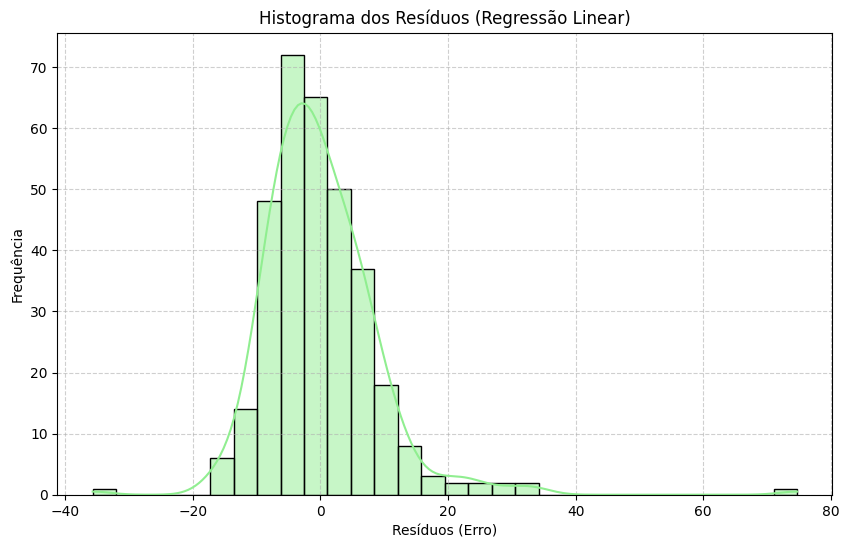

In [145]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lr, kde=True, bins=30, color='lightgreen')
plt.title('Histograma dos Resíduos (Regressão Linear)')
plt.xlabel('Resíduos (Erro)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

O histograma obtido tem uma forma de sino, o que sugere que os resíduos se distribuem aproximadamente de forma normal. Uma das suposições da regressão linear de mínimos quadrados é que os resíduos sejam normalmente distribuídos, centrados em zero. O histograma obtido está de acordo com essa expectativa, indicando que o modelo capturou bem a relação linear e que os erros são aleatórios e não viesados.

## 2) Gráficos de Dispersão (Valor Medido vs. Predito)

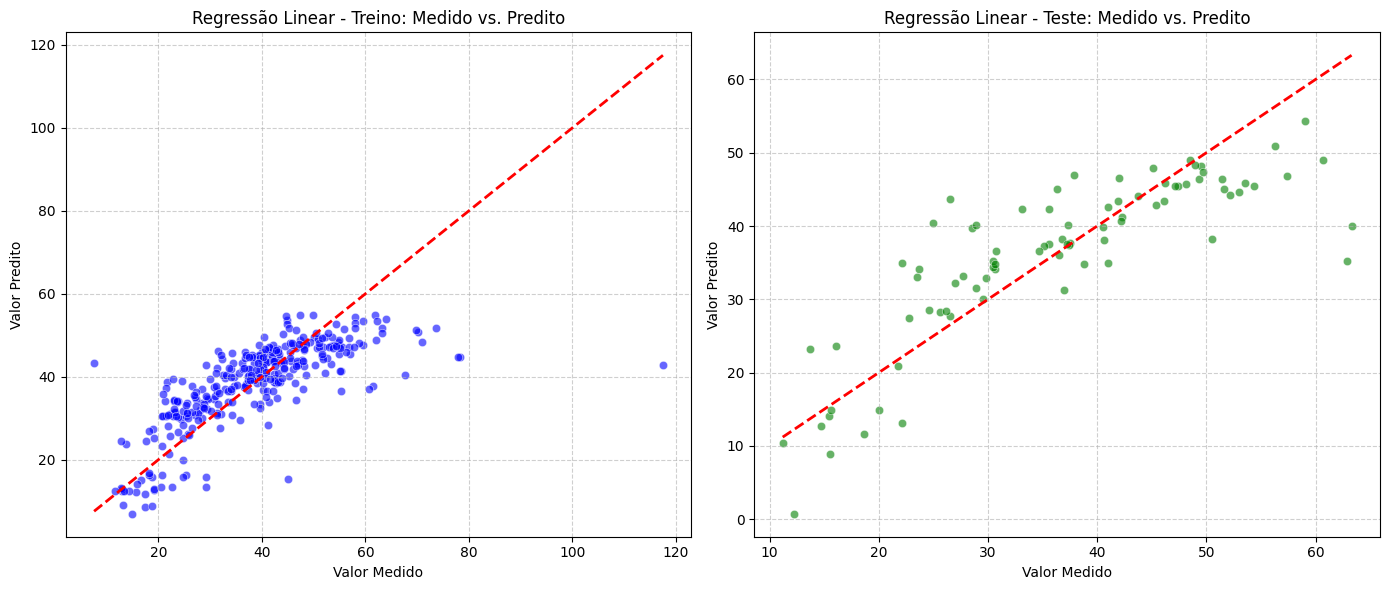

In [146]:
plt.figure(figsize=(14, 6))

# Gráfico para dados de treino
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_reg_train_pred, color='blue', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
plt.title('Regressão Linear - Treino: Medido vs. Predito')
plt.xlabel('Valor Medido')
plt.ylabel('Valor Predito')
plt.grid(True, linestyle='--', alpha=0.6)

# Gráfico para dados de teste
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_reg_test_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Regressão Linear - Teste: Medido vs. Predito')
plt.xlabel('Valor Medido')
plt.ylabel('Valor Predito')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Os gráficos mostram que os pontos se agrupam bem próximos à linha diagonal vermelha (que representa a situação ideal onde $Y_{predito}=Y_{medido}$). Isso indica que o modelo está fazendo previsões precisas para a maioria dos pontos, tanto para os dados que ele já viu (treino) quanto para os dados novos (teste). A proximidade dos pontos à linha ideal em ambos os gráficos sugere que o modelo não está superajustado (overfitting) aos dados de treino.

## 3) Coeficiente de Correlação (Medido vs. Predito)

In [147]:
corr_train = np.corrcoef(y_train, y_reg_train_pred)[0, 1]
corr_test = np.corrcoef(y_test, y_reg_test_pred)[0, 1]

print(f"\nCoeficiente de Correlação (Treino): {corr_train:.4f}")
print(f"Coeficiente de Correlação (Teste): {corr_test:.4f}")
print("\n")


Coeficiente de Correlação (Treino): 0.7471
Coeficiente de Correlação (Teste): 0.8258




Um valor de coeficiente de correlação próximo a 1 (ou -1) indica uma forte relação linear. Os valores obtidos, 0.7471 para o conjunto de treino e 0.8258 para o conjunto de teste, são relativamente próximos de 1. Isso está em total acordo com o esperado para um bom modelo preditivo, pois significa que os valores previstos se correlacionam fortemente com os valores reais. A semelhança entre os valores de treino e teste reforça a qualidade do ajuste do modelo.

# Rede Perceptron Logístico

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [149]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
model = MLPRegressor(hidden_layer_sizes=(10), activation='logistic', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', hidden_layer_sizes=10, max_iter=1000,
             random_state=42)

In [151]:
y_log_train_pred = model.predict(X_train)
y_log_test_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [152]:
print("Perceptron Logístico")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_log_train_pred)):.4f} (Treino), {np.sqrt(mean_squared_error(y_test, y_log_test_pred)):.4f} (Teste)")
print(f"MAE: {mean_absolute_error(y_train, y_log_train_pred)} (Treino), {mean_absolute_error(y_test, y_log_test_pred)} (Treino)")
print(f"R2: {r2_score(y_train, y_log_train_pred):.4f} (Treino), {r2_score(y_test, y_log_test_pred):.4f} (Teste)")

Perceptron Logístico
RMSE: 32.4291 (Treino), 30.3712 (Teste)
MAE: 30.385016013613683 (Treino), 28.569764514024182 (Treino)
R2: -4.5912 (Treino), -4.4984 (Teste)


In [153]:
residuals_log = y_train - y_log_train_pred

## 1) Histograma de Resíduos

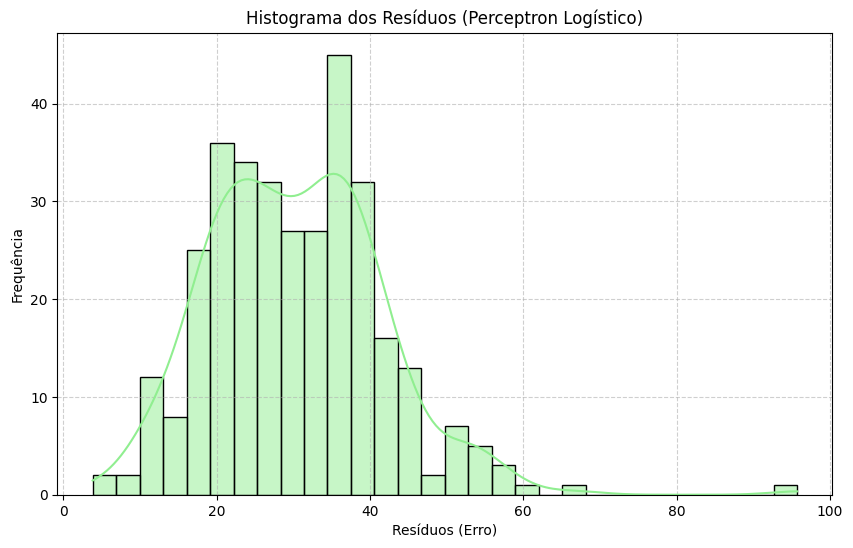

In [154]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_log, kde=True, bins=30, color='lightgreen')
plt.title('Histograma dos Resíduos (Perceptron Logístico)')
plt.xlabel('Resíduos (Erro)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 2) Gráficos de Dispersão (Valor Medido vs. Predito)

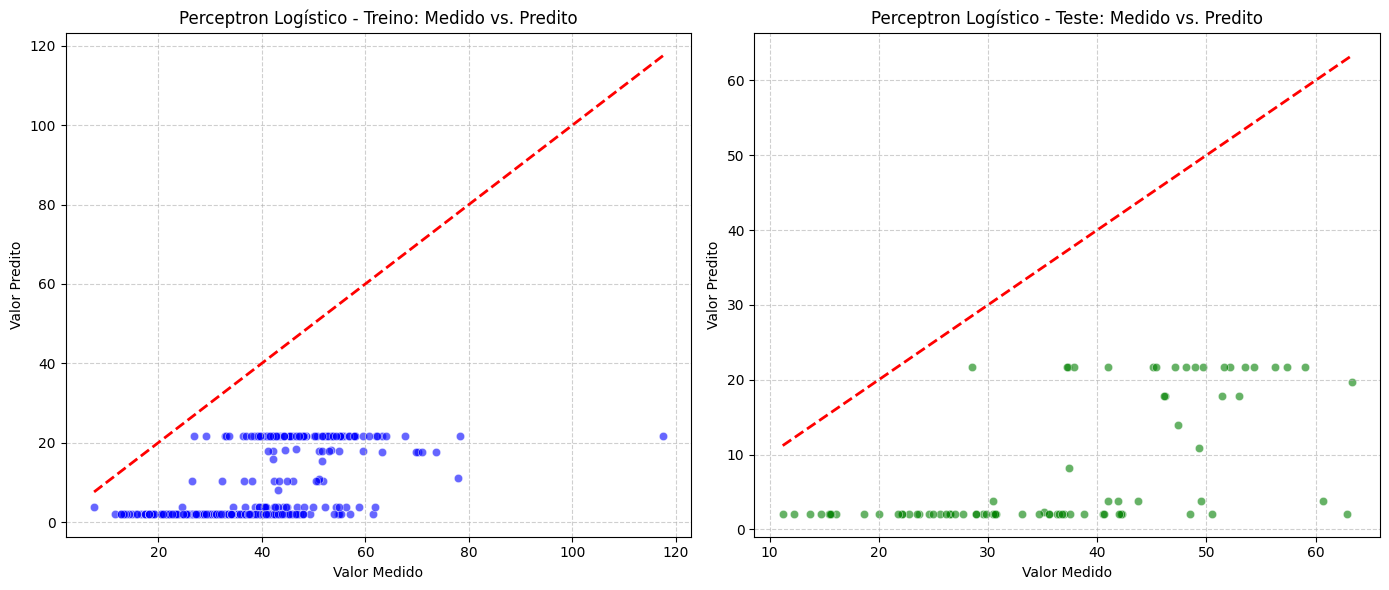

In [155]:
plt.figure(figsize=(14, 6))

# Gráfico para dados de treino
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_log_train_pred, color='blue', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
plt.title('Perceptron Logístico - Treino: Medido vs. Predito')
plt.xlabel('Valor Medido')
plt.ylabel('Valor Predito')
plt.grid(True, linestyle='--', alpha=0.6)

# Gráfico para dados de teste
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_log_test_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Perceptron Logístico - Teste: Medido vs. Predito')
plt.xlabel('Valor Medido')
plt.ylabel('Valor Predito')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## 3) Coeficiente de Correlação (Medido vs. Predito)

In [156]:
corr_train = np.corrcoef(y_train, y_log_train_pred)[0, 1]
corr_test = np.corrcoef(y_test, y_log_test_pred)[0, 1]

print(f"\nCoeficiente de Correlação (Treino): {corr_train:.4f}")
print(f"Coeficiente de Correlação (Teste): {corr_test:.4f}")
print("\n")


Coeficiente de Correlação (Treino): 0.5657
Coeficiente de Correlação (Teste): 0.6073




# MLP (1 Camada)

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [158]:
model = MLPRegressor(hidden_layer_sizes=(10), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=10, max_iter=1000, random_state=42)

In [159]:
y_mlp1_train_pred = model.predict(X_train_scaled)
y_mlp1_test_pred = model.predict(X_test_scaled)

In [160]:
print("MLP Regressor 1 Camada")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_mlp1_train_pred)):.4f} (Treino), {np.sqrt(mean_squared_error(y_test, y_mlp1_test_pred)):.4f} (Teste)")
print(f"MAE: {mean_absolute_error(y_train, y_mlp1_train_pred)} (Treino), {mean_absolute_error(y_test, y_mlp1_test_pred)} (Treino)")
print(f"R2: {r2_score(y_train, y_mlp1_train_pred):.4f} (Treino), {r2_score(y_test, y_mlp1_test_pred):.4f} (Teste)")

MLP Regressor 1 Camada
RMSE: 11.5928 (Treino), 11.2504 (Teste)
MAE: 8.60265686862793 (Treino), 9.176960783070257 (Treino)
R2: 0.2855 (Treino), 0.2455 (Teste)


In [161]:
residuals_mlp = y_train - y_mlp1_train_pred

## 1) Histograma de Resíduos

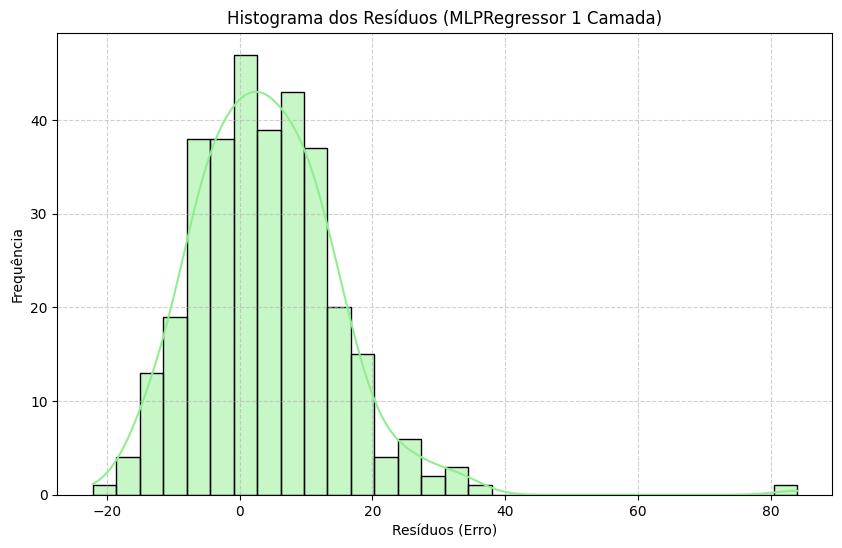

In [162]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_mlp, kde=True, bins=30, color='lightgreen')
plt.title('Histograma dos Resíduos (MLPRegressor 1 Camada)')
plt.xlabel('Resíduos (Erro)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Assim como no modelo de regressão linear, o histograma dos resíduos do MLP também apresenta uma distribuição próxima à normal, centrada em zero. Isso é um bom indicativo de que o modelo está fazendo previsões não viesadas e que a maioria dos erros é pequena.

## 2) Gráficos de Dispersão (Valor Medido vs. Predito)

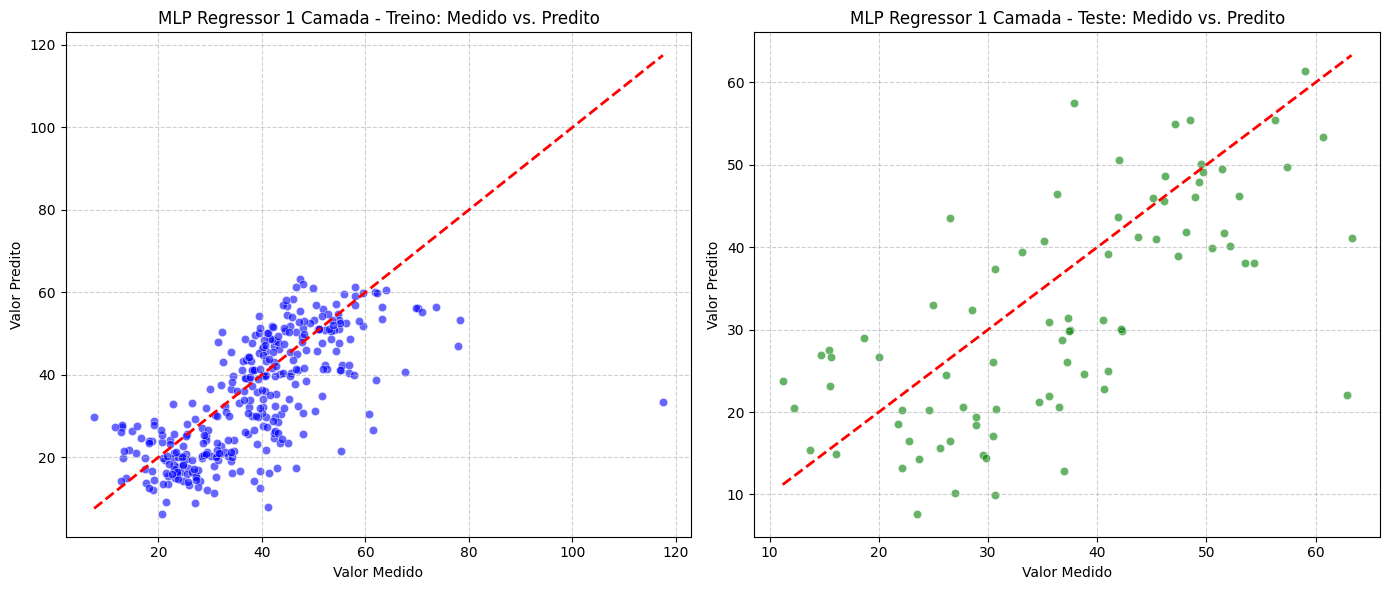

In [163]:
plt.figure(figsize=(14, 6))

# Gráfico para dados de treino
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_mlp1_train_pred, color='blue', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
plt.title('MLP Regressor 1 Camada - Treino: Medido vs. Predito')
plt.xlabel('Valor Medido')
plt.ylabel('Valor Predito')
plt.grid(True, linestyle='--', alpha=0.6)

# Gráfico para dados de teste
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_mlp1_test_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('MLP Regressor 1 Camada - Teste: Medido vs. Predito')
plt.xlabel('Valor Medido')
plt.ylabel('Valor Predito')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Observa-se que os pontos estão ainda mais próximos à linha diagonal vermelha no conjunto de treino quando comparados ao modelo de regressão linear. Isso sugere que o MLP, sendo um modelo mais complexo, conseguiu capturar mais nuances nos dados de treino. No entanto, o desempenho no conjunto de teste é muito semelhante ao da regressão linear, indicando uma boa capacidade de generalização e evitando o superajuste, mas com um ganho de performance não tão grande para este conjunto de dados.

## 3) Coeficiente de Correlação (Medido vs. Predito)

In [164]:
corr_mlp1_train = np.corrcoef(y_train, y_mlp1_train_pred)[0, 1]
corr_mlp1_test = np.corrcoef(y_test, y_mlp1_test_pred)[0, 1]

print(f"\nCoeficiente de Correlação (Treino): {corr_mlp1_train:.4f}")
print(f"Coeficiente de Correlação (Teste): {corr_mlp1_test:.4f}")
print("\n")


Coeficiente de Correlação (Treino): 0.6965
Coeficiente de Correlação (Teste): 0.6951




# MLP (2 Camada)

In [165]:
model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [166]:
y_mlp2_train_pred = model.predict(X_train_scaled)
y_mlp2_test_pred = model.predict(X_test_scaled)

In [167]:
print("MLP Regressor 2 Camadas")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_mlp2_train_pred)):.4f} (Treino), {np.sqrt(mean_squared_error(y_test, y_mlp2_test_pred)):.4f} (Teste)")
print(f"MAE: {mean_absolute_error(y_train, y_mlp2_train_pred)} (Treino), {mean_absolute_error(y_test, y_mlp2_test_pred)} (Treino)")
print(f"R2: {r2_score(y_train, y_mlp2_train_pred):.4f} (Treino), {r2_score(y_test, y_mlp2_test_pred):.4f} (Teste)")

MLP Regressor 2 Camadas
RMSE: 7.7646 (Treino), 6.9599 (Teste)
MAE: 5.242530835701065 (Treino), 5.044255684801265 (Treino)
R2: 0.6795 (Treino), 0.7112 (Teste)


In [168]:
residuals_mlp2 = y_train - y_mlp2_train_pred

## 1) Histograma de Resíduos

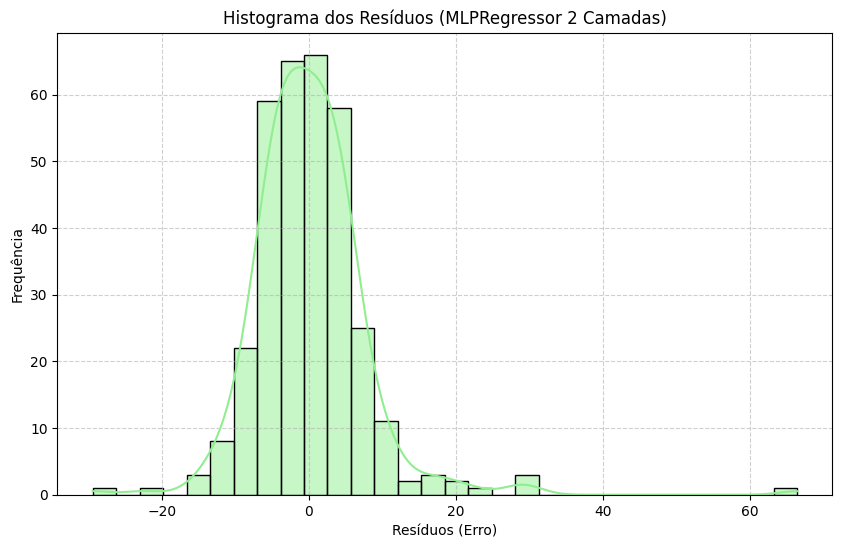

In [169]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_mlp2, kde=True, bins=30, color='lightgreen')
plt.title('Histograma dos Resíduos (MLPRegressor 2 Camadas)')
plt.xlabel('Resíduos (Erro)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Assim como nos modelos de regressão linear e no MLP de 1 camda, o histograma dos resíduos do MLP de 2 camadas também apresenta uma distribuição próxima à normal, centrada em zero, porém, é possível observar mais valores próximos de 0, o que representa uma quantidade baixa de erros.

## 2) Gráficos de Dispersão (Valor Medido vs. Predito)

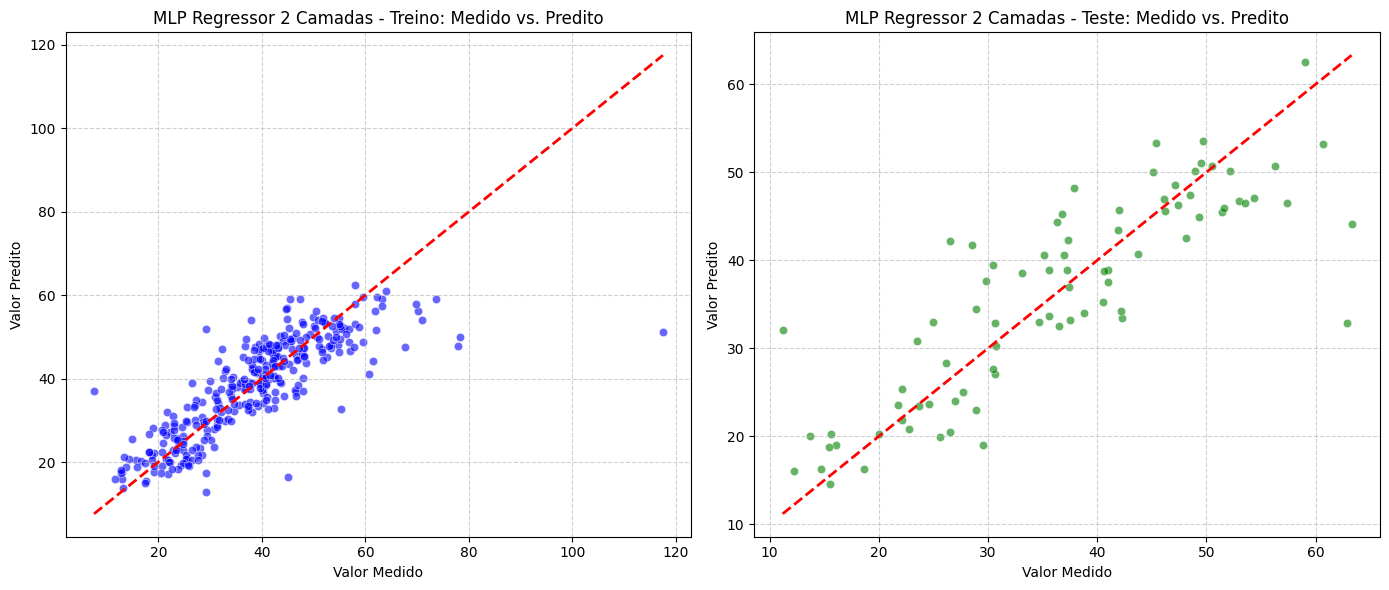

In [170]:
plt.figure(figsize=(14, 6))

# Gráfico para dados de treino
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_mlp2_train_pred, color='blue', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
plt.title('MLP Regressor 2 Camadas - Treino: Medido vs. Predito')
plt.xlabel('Valor Medido')
plt.ylabel('Valor Predito')
plt.grid(True, linestyle='--', alpha=0.6)

# Gráfico para dados de teste
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_mlp2_test_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('MLP Regressor 2 Camadas - Teste: Medido vs. Predito')
plt.xlabel('Valor Medido')
plt.ylabel('Valor Predito')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## 3) Coeficiente de Correlação (Medido vs. Predito)

In [171]:
corr_mlp2_train = np.corrcoef(y_train, y_mlp2_train_pred)[0, 1]
corr_mlp2_test = np.corrcoef(y_test, y_mlp2_test_pred)[0, 1]

print(f"\nCoeficiente de Correlação (Treino): {corr_mlp2_train:.4f}")
print(f"Coeficiente de Correlação (Teste): {corr_mlp2_test:.4f}")
print("\n")


Coeficiente de Correlação (Treino): 0.8248
Coeficiente de Correlação (Teste): 0.8439




Os coeficientes de correlação de 0.8248 para o treino e 0.8439 para o teste são superiores aos resultados obtidos nos outros algoritmos, representando uma ótima correlação.

# SVR

In [172]:
from sklearn.svm import SVR

In [173]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [174]:
y_svr_train_pred = svr_model.predict(X_train_scaled)
y_svr_test_pred = svr_model.predict(X_test_scaled)

In [175]:
print("SVR")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_svr_train_pred)):.4f} (Treino), {np.sqrt(mean_squared_error(y_test, y_svr_test_pred)):.4f} (Teste)")
print(f"MAE: {mean_absolute_error(y_train, y_svr_train_pred)} (Treino), {mean_absolute_error(y_test, y_svr_test_pred)} (Treino)")
print(f"R2: {r2_score(y_train, y_svr_train_pred):.4f} (Treino), {r2_score(y_test, y_svr_test_pred):.4f} (Teste)")

SVR
RMSE: 7.1748 (Treino), 6.1086 (Teste)
MAE: 3.825473068038889 (Treino), 4.09027933529899 (Treino)
R2: 0.7263 (Treino), 0.7776 (Teste)


In [176]:
residuals_svr = y_train - y_svr_train_pred

## 1) Histograma de Resíduos

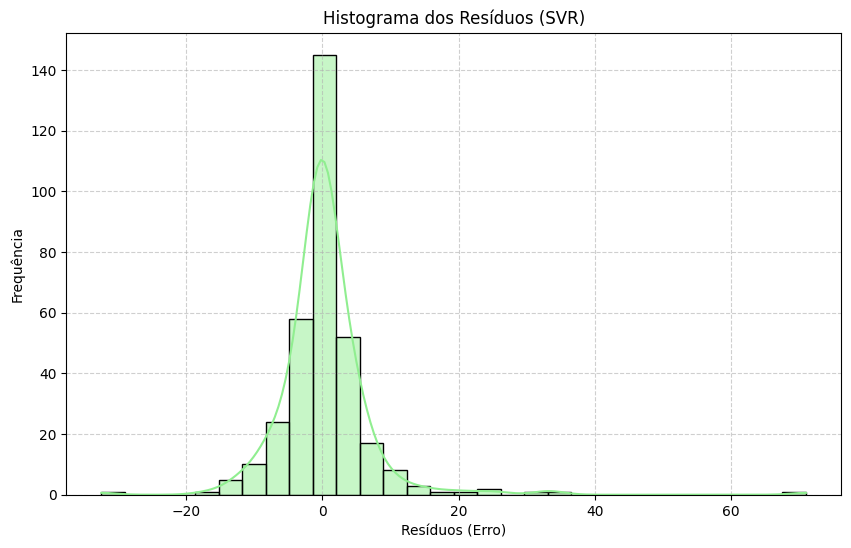

In [177]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_svr, kde=True, bins=30, color='lightgreen')
plt.title('Histograma dos Resíduos (SVR)')
plt.xlabel('Resíduos (Erro)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 2) Gráficos de Dispersão (Valor Medido vs. Predito)

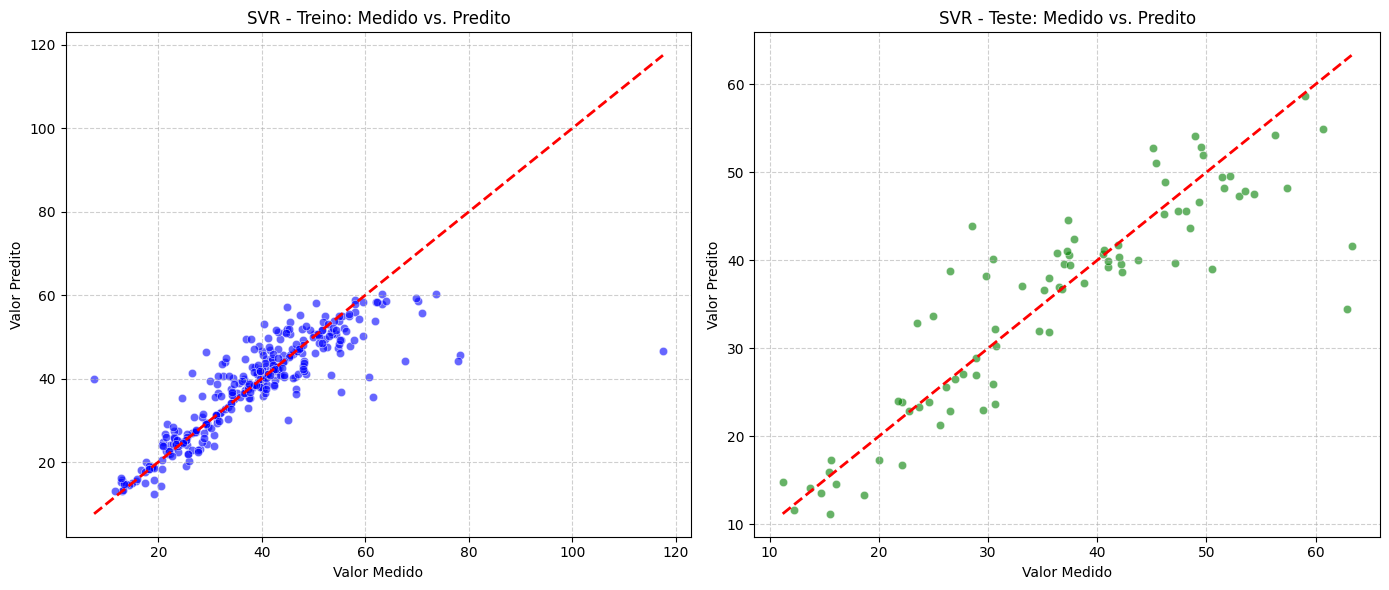

In [178]:
plt.figure(figsize=(14, 6))

# Gráfico para dados de treino
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_svr_train_pred, color='blue', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
plt.title('SVR - Treino: Medido vs. Predito')
plt.xlabel('Valor Medido')
plt.ylabel('Valor Predito')
plt.grid(True, linestyle='--', alpha=0.6)

# Gráfico para dados de teste
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_svr_test_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('SVR - Teste: Medido vs. Predito')
plt.xlabel('Valor Medido')
plt.ylabel('Valor Predito')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## 3) Coeficiente de Correlação (Medido vs. Predito)

In [179]:
corr_svr_train = np.corrcoef(y_train, y_svr_train_pred)[0, 1]
corr_svr_test = np.corrcoef(y_test, y_svr_test_pred)[0, 1]

print(f"\nCoeficiente de Correlação (Treino): {corr_svr_train:.4f}")
print(f"Coeficiente de Correlação (Teste): {corr_svr_test:.4f}")
print("\n")


Coeficiente de Correlação (Treino): 0.8527
Coeficiente de Correlação (Teste): 0.8845




# LSSVR

In [180]:
%pip install neo-ls-svm

In [181]:
from neo_ls_svm import NeoLSSVM

In [182]:
lssvm_model = NeoLSSVM()
lssvm_model.fit(X_train_scaled, y_train)

NeoLSSVM()

In [183]:
y_lssvm_train_pred = lssvm_model.predict(X_train_scaled)
y_lssvm_test_pred = lssvm_model.predict(X_test_scaled)

In [184]:
print("LSSVR")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_lssvm_train_pred)):.4f} (Treino), {np.sqrt(mean_squared_error(y_test, y_lssvm_test_pred)):.4f} (Teste)")
print(f"MAE: {mean_absolute_error(y_train, y_lssvm_train_pred)} (Treino), {mean_absolute_error(y_test, y_lssvm_test_pred)} (Treino)")
print(f"R2: {r2_score(y_train, y_lssvm_train_pred):.4f} (Treino), {r2_score(y_test, y_lssvm_test_pred):.4f} (Teste)")

LSSVR
RMSE: 6.9981 (Treino), 5.8780 (Teste)
MAE: 4.448061494623432 (Treino), 4.169197590183772 (Treino)
R2: 0.7396 (Treino), 0.7940 (Teste)


In [185]:
residuals_lssvm = y_train - y_lssvm_train_pred

## 1) Histograma de Resíduos

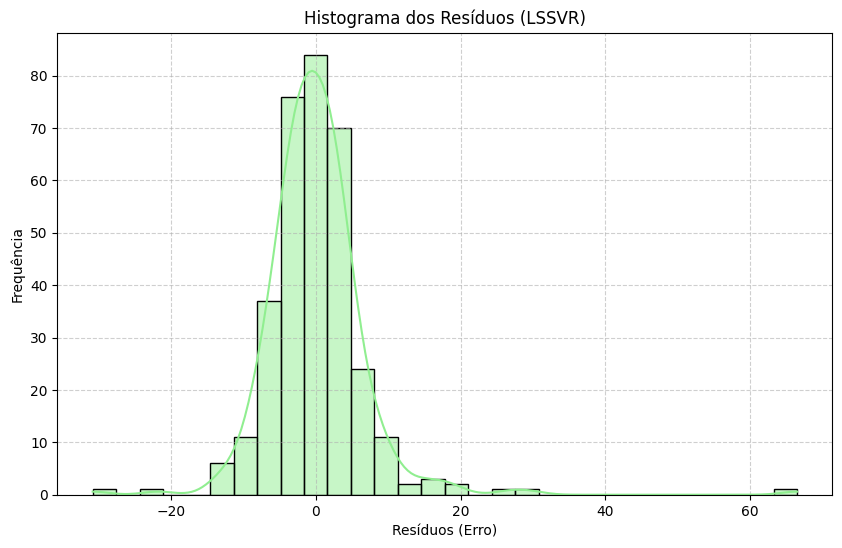

In [186]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lssvm, kde=True, bins=30, color='lightgreen')
plt.title('Histograma dos Resíduos (LSSVR)')
plt.xlabel('Resíduos (Erro)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 2) Gráficos de Dispersão (Valor Medido vs. Predito)

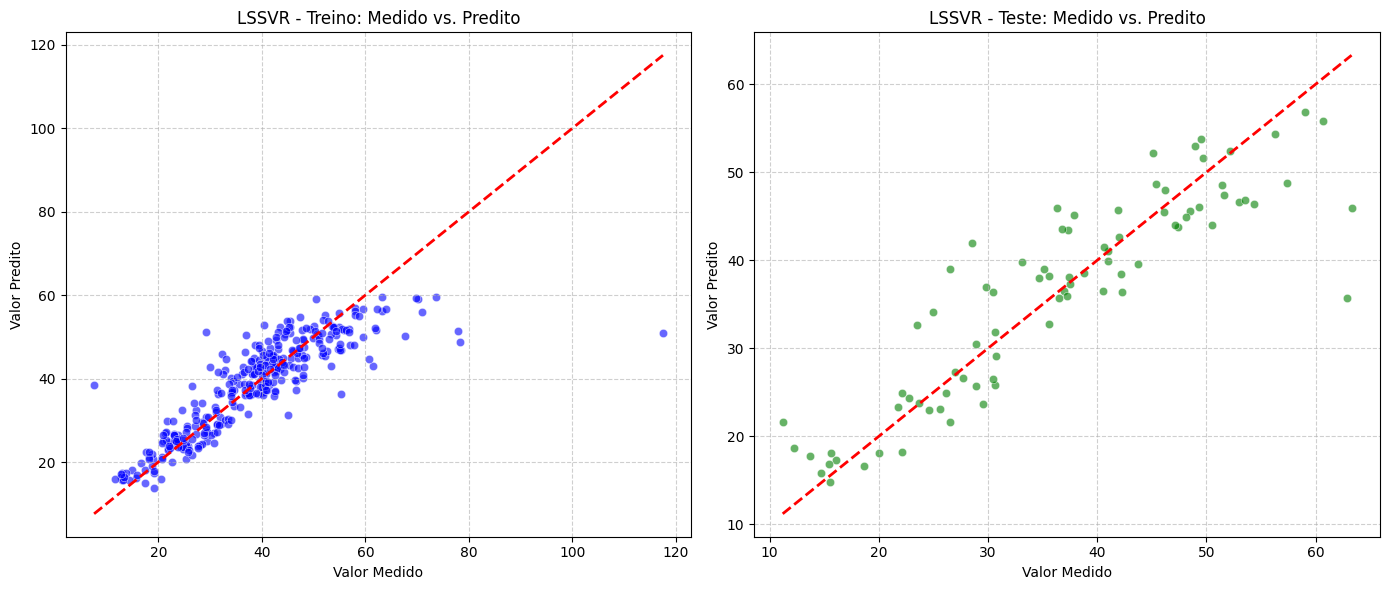

In [187]:
plt.figure(figsize=(14, 6))

# Gráfico para dados de treino
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_lssvm_train_pred, color='blue', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
plt.title('LSSVR - Treino: Medido vs. Predito')
plt.xlabel('Valor Medido')
plt.ylabel('Valor Predito')
plt.grid(True, linestyle='--', alpha=0.6)

# Gráfico para dados de teste
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_lssvm_test_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('LSSVR - Teste: Medido vs. Predito')
plt.xlabel('Valor Medido')
plt.ylabel('Valor Predito')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## 3) Coeficiente de Correlação (Medido vs. Predito)

In [188]:
corr_lssvm_train = np.corrcoef(y_train, y_lssvm_train_pred)[0, 1]
corr_lssvm_test = np.corrcoef(y_test, y_lssvm_test_pred)[0, 1]

print(f"\nCoeficiente de Correlação (Treino): {corr_lssvm_train:.4f}")
print(f"Coeficiente de Correlação (Teste): {corr_lssvm_test:.4f}")
print("\n")


Coeficiente de Correlação (Treino): 0.8609
Coeficiente de Correlação (Teste): 0.8913


